# On-going Etna Eruption 
  ( a simple exercise )


In February and March 2017, Sicialian biggest volcanoe Etna woke up and eruptted several times. We will use satellite images to observe how was the event seen from space.

First a quick instruction how to use this Jupyter Notebook. You can execute a cell in two ways:
- by clikcing on hte cell and then cliking on play icon or
- by clicking on it and then pressing ctrl + Enter. Lets try this with the following cell:

In [7]:
print ("Well done, you have successfully executed the code in this cell!")

Well done, you have successfully executed the code in this cell!


If you managed to execute the code successfully, you will see something like this:

<table>
<tr>
<td> <img src="images/Instructions.png" alt="Drawing" style="width: 800px;"/> </td>
</tr>
<tr>
<td style="text-align:left"> <i>Result of successfull execution of the cell. The number in squared tells you how many executions you've done in this session. Yours can be different aas teh one in the figure but important is to have the line of black test written below  the cell.</i></td>
</tr>
</table>

Back to Etna now.

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox
import datetime
import numpy as np
import matplotlib.pyplot as plt
import requests as  r
import ipywidgets as widgets
from IPython.display import display

INSTANCE_ID = ''

def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    #fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

In [6]:
etna_bbox_web_mercator = [14.92, 37.67, 15.05, 37.81]
etna_bbox = BBox(bbox=etna_bbox_web_mercator, crs=CRS.WGS84)

wms_true_color_request = WmsRequest(data_folder='data',
                                    layer='TRUE-COLOR-S2-L1C',
                                    bbox=etna_bbox,
                                    time=('2017-02-27','2017-04-18'),
                                    width=512,
                                    maxcc=0.7,
                                    instance_id=INSTANCE_ID)
wms_bands_request = WmsRequest(data_folder='data',
                               layer='BANDS-S2-L1C',
                               bbox=etna_bbox,
                               time=('2017-02-27','2017-04-18'),
                               width=512,
                               image_format=MimeType.TIFF_d32f,
                               maxcc=0.7,
                               instance_id=INSTANCE_ID)
wms_true_color_img = wms_true_color_request.get_data(save_data=True)
wms_true_color__dates = wms_true_color_request.get_dates()
wms_bands_img = wms_bands_request.get_data(save_data=True)
wms_bands_dates = wms_bands_request.get_dates()

DownloadFailedException: Failed to download from:
https://services.sentinel-hub.com/ogc/wfs/'caa601dd-b742-4a23-9521-d28b6a5c50e0'?SERVICE=wfs&REQUEST=GetFeature&TYPENAMES=S2.TILE&BBOX=37.67%2C14.92%2C37.81%2C15.05&OUTPUTFORMAT=application%2Fjson&SRSNAME=EPSG%3A4326&TIME=2017-02-27T00%3A00%3A00%2F2017-04-18T23%3A59%3A59&MAXCC=70.0&MAXFEATURES=100&FEATURE_OFFSET=0
with HTTPError:
404 Client Error: Not Found for url: https://services.sentinel-hub.com/ogc/wfs/'caa601dd-b742-4a23-9521-d28b6a5c50e0'?SERVICE=wfs&REQUEST=GetFeature&TYPENAMES=S2.TILE&BBOX=37.67%2C14.92%2C37.81%2C15.05&OUTPUTFORMAT=application%2Fjson&SRSNAME=EPSG%3A4326&TIME=2017-02-27T00%3A00%3A00%2F2017-04-18T23%3A59%3A59&MAXCC=70.0&MAXFEATURES=100&FEATURE_OFFSET=0
Server response: "For input string: "'caa601dd""

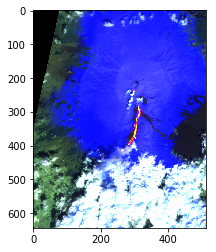

In [4]:
plot_image(wms_bands_img[-4][:, :, [12, 11, 4]], 2.5)

In [11]:
def draw_an_image(images, i):
    """
    This function will draw an image selected from the list of "images" for a given "date". 
    It is linked to dropdown list from which user can select image to be drawn.
    """
    
    plot_image(images[i][:, :, [12, 11, 4]], 2.5)
    

widgets.interact(draw_an_image, images=widgets.fixed(wms_bands_img), i=range(len(wms_bands_dates) ))

A Jupyter Widget

<function __main__.draw_an_image>

In [25]:
def draw_an_image(images, i):
    """
    This function will draw an image selected from the list of "images" for a given "date". 
    It is linked to dropdown list from which user can select image to be drawn.
    """
    
    plot_image(images[wms_bands_dates.index(dropdown_date.value)][:, :, [12, 11, 4]], 2.5)

dropdown_date = widgets.Dropdown(
                                options=wms_bands_dates,
                                value=wms_bands_dates[0],
                                description='Date:',
                                disabled=False,
                                )

widgets.interact(draw_an_image, images=widgets.fixed(wms_bands_img), i=dropdown_date)

A Jupyter Widget

<function __main__.draw_an_image>

In [31]:
def draw_an_image(images, i):
    """
    This function will draw an image selected from the list of "images" for a given "date". 
    It is linked to dropdown list from which user can select image to be drawn.
    """
    
    plot_image(images[wms_bands_dates.index(slider_date.value)][:, :, [12, 11, 4]], 2.5)

slider_date = widgets.SelectionSlider(
    options=wms_bands_dates,
    value=wms_bands_dates[0],
    description='Date:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
    )

widgets.interact(draw_an_image, images=widgets.fixed(wms_bands_img), i=slider_date)

A Jupyter Widget

<function __main__.draw_an_image>